d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\0ilraypan\python_work\env\tensorflow=1.14\l

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Extracting ./mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(55000, 784)
(55000, 10)


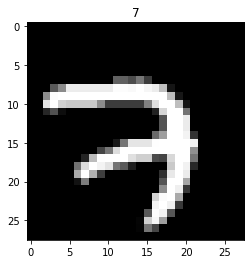

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Step: 0 | train loss: 2.2956 | test accuracy: 0.14


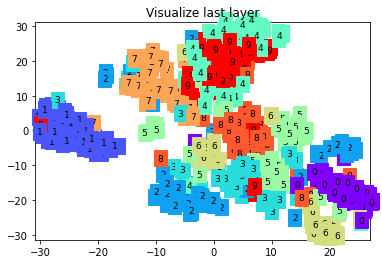

Step: 50 | train loss: 0.3619 | test accuracy: 0.48


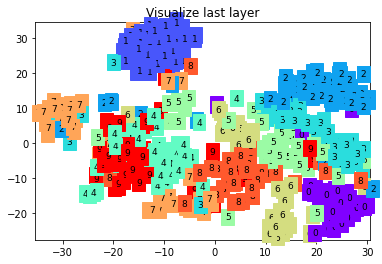

Step: 100 | train loss: 0.2205 | test accuracy: 0.61


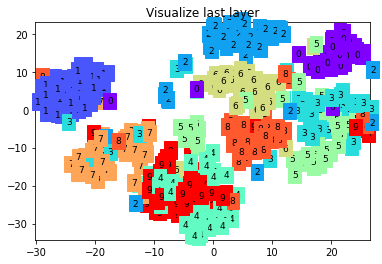

Step: 150 | train loss: 0.2451 | test accuracy: 0.69


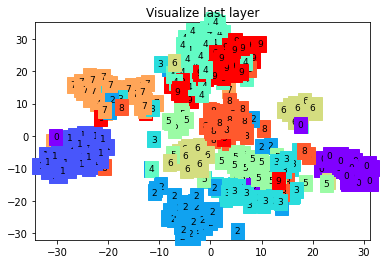

Step: 200 | train loss: 0.1982 | test accuracy: 0.74


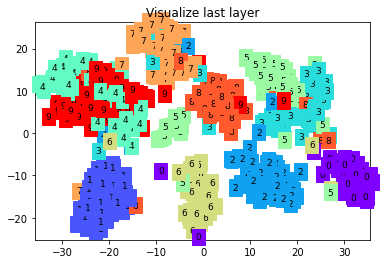

Step: 250 | train loss: 0.2192 | test accuracy: 0.77


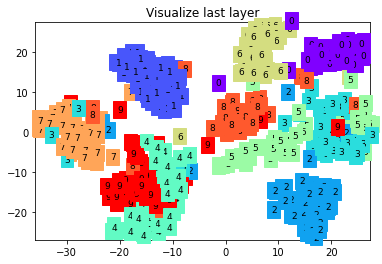

Step: 300 | train loss: 0.0824 | test accuracy: 0.79


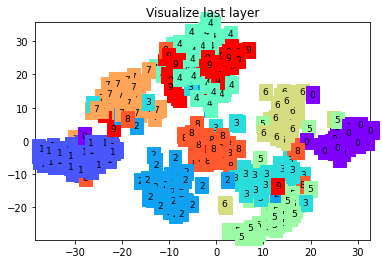

Step: 350 | train loss: 0.0702 | test accuracy: 0.81


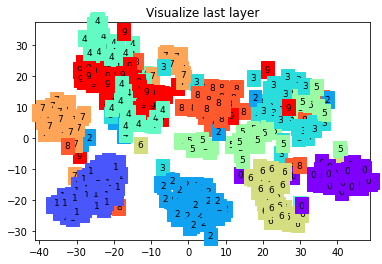

Step: 400 | train loss: 0.1073 | test accuracy: 0.83


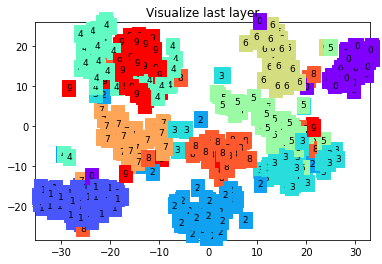

Step: 450 | train loss: 0.0765 | test accuracy: 0.84


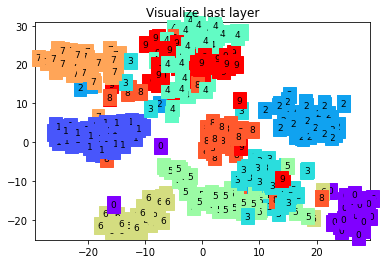

Step: 500 | train loss: 0.1921 | test accuracy: 0.85


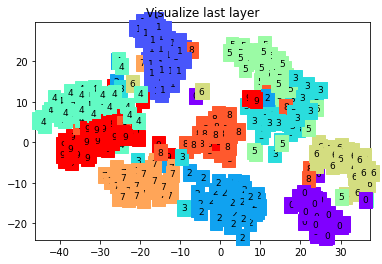

Step: 550 | train loss: 0.1210 | test accuracy: 0.86


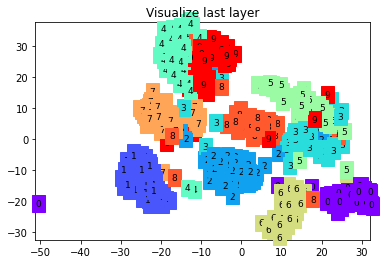

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
Extracting ./mnist\train-images-idx3-ubyte.gz
Extracting ./mnist\train-labels-idx1-ubyte.gz
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Extracting ./mnist\t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)


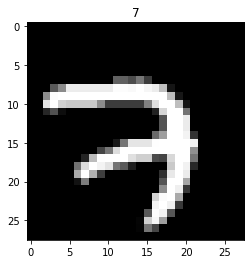

Step: 0 | train loss: 2.3481 | test accuracy: 0.14


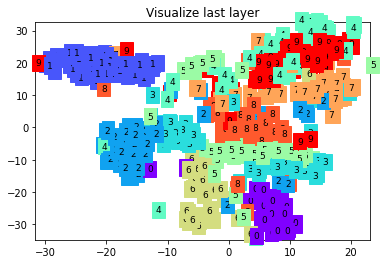

Step: 50 | train loss: 0.3976 | test accuracy: 0.47


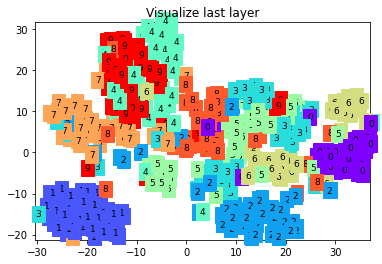

Step: 100 | train loss: 0.2310 | test accuracy: 0.61


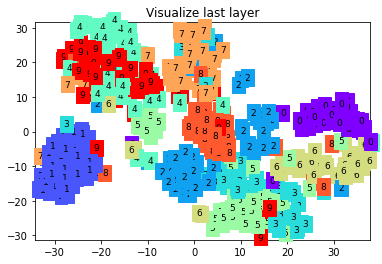

Step: 150 | train loss: 0.2557 | test accuracy: 0.68


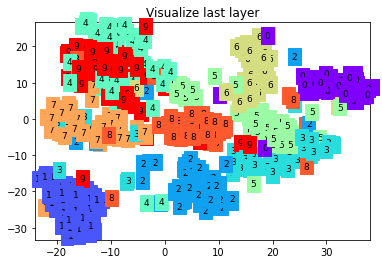

Step: 200 | train loss: 0.2597 | test accuracy: 0.73


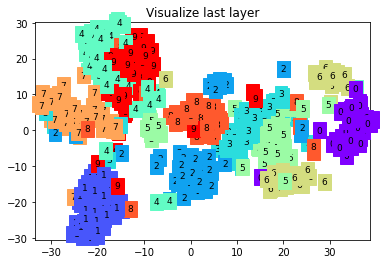

Step: 250 | train loss: 0.1863 | test accuracy: 0.77


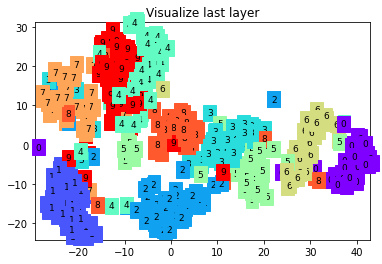

Step: 300 | train loss: 0.1020 | test accuracy: 0.79


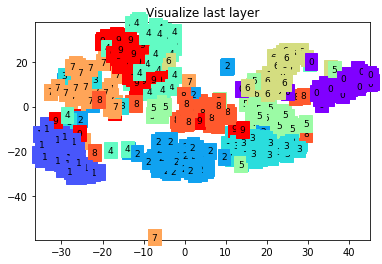

Step: 350 | train loss: 0.0996 | test accuracy: 0.81


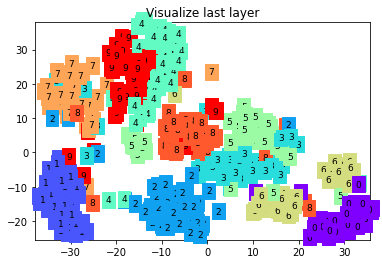

Step: 400 | train loss: 0.0859 | test accuracy: 0.83


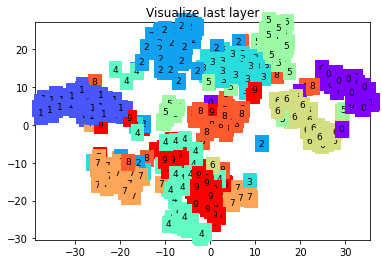

Step: 450 | train loss: 0.0855 | test accuracy: 0.84


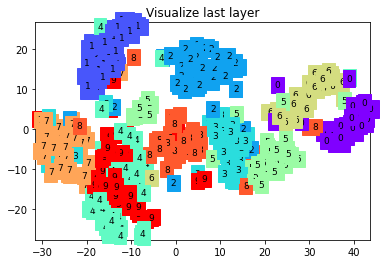

Step: 500 | train loss: 0.1637 | test accuracy: 0.85


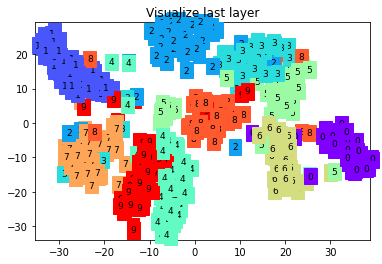

Step: 550 | train loss: 0.1842 | test accuracy: 0.86


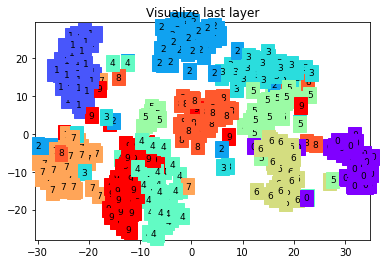

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


In [2]:
"""
Know more, visit my Python tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
tensorflow: 1.1.0
matplotlib
numpy
"""
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(1)
np.random.seed(1)

BATCH_SIZE = 50
LR = 0.001              # learning rate

mnist = input_data.read_data_sets('./mnist', one_hot=True)  # they has been normalized to range (0,1)
test_x = mnist.test.images[:2000]
test_y = mnist.test.labels[:2000]

# plot one example
print(mnist.train.images.shape)     # (55000, 28 * 28)
print(mnist.train.labels.shape)   # (55000, 10)
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0])); plt.show()

tf_x = tf.placeholder(tf.float32, [None, 28*28]) / 255.
image = tf.reshape(tf_x, [-1, 28, 28, 1])              # (batch, height, width, channel)
tf_y = tf.placeholder(tf.int32, [None, 10])            # input y

# CNN
conv1 = tf.layers.conv2d(   # shape (28, 28, 1)
    inputs=image,
    filters=16,
    kernel_size=5,
    strides=1,
    padding='same',
    activation=tf.nn.relu
)           # -> (28, 28, 16)
pool1 = tf.layers.max_pooling2d(
    conv1,
    pool_size=2,
    strides=2,
)           # -> (14, 14, 16)
conv2 = tf.layers.conv2d(pool1, 32, 5, 1, 'same', activation=tf.nn.relu)    # -> (14, 14, 32)
pool2 = tf.layers.max_pooling2d(conv2, 2, 2)    # -> (7, 7, 32)
flat = tf.reshape(pool2, [-1, 7*7*32])          # -> (7*7*32, )
output = tf.layers.dense(flat, 10)              # output layer

loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits=output)           # compute cost
train_op = tf.train.AdamOptimizer(LR).minimize(loss)

accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.argmax(tf_y, axis=1), predictions=tf.argmax(output, axis=1),)[1]

sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) # the local var is for accuracy_op
sess.run(init_op)     # initialize var in graph

# following function (plot_with_labels) is for visualization, can be ignored if not interested
from matplotlib import cm
try: from sklearn.manifold import TSNE; HAS_SK = True
except: HAS_SK = False; print('\nPlease install sklearn for layer visualization\n')
def plot_with_labels(lowDWeights, labels):
    plt.cla(); X, Y = lowDWeights[:, 0], lowDWeights[:, 1]
    for x, y, s in zip(X, Y, labels):
        c = cm.rainbow(int(255 * s / 9)); plt.text(x, y, s, backgroundcolor=c, fontsize=9)
    plt.xlim(X.min(), X.max()); plt.ylim(Y.min(), Y.max()); plt.title('Visualize last layer'); plt.show(); plt.pause(0.01)

plt.ion()
for step in range(600):
    b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
    _, loss_ = sess.run([train_op, loss], {tf_x: b_x, tf_y: b_y})
    if step % 50 == 0:
        accuracy_, flat_representation = sess.run([accuracy, flat], {tf_x: test_x, tf_y: test_y})
        print('Step:', step, '| train loss: %.4f' % loss_, '| test accuracy: %.2f' % accuracy_)

        if HAS_SK:
            # Visualization of trained flatten layer (T-SNE)
            tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000); plot_only = 500
            low_dim_embs = tsne.fit_transform(flat_representation[:plot_only, :])
            labels = np.argmax(test_y, axis=1)[:plot_only]; plot_with_labels(low_dim_embs, labels)
plt.ioff()

# print 10 predictions from test data
test_output = sess.run(output, {tf_x: test_x[:10]})
pred_y = np.argmax(test_output, 1)
print(pred_y, 'prediction number')
print(np.argmax(test_y[:10], 1), 'real number')

